# Regression with A Crab Age Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
train = pd.read_csv('playground-series-s3e16/train.csv', index_col='id')
test = pd.read_csv('playground-series-s3e16/test.csv', index_col='id')
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


/Users/anbschool0029/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


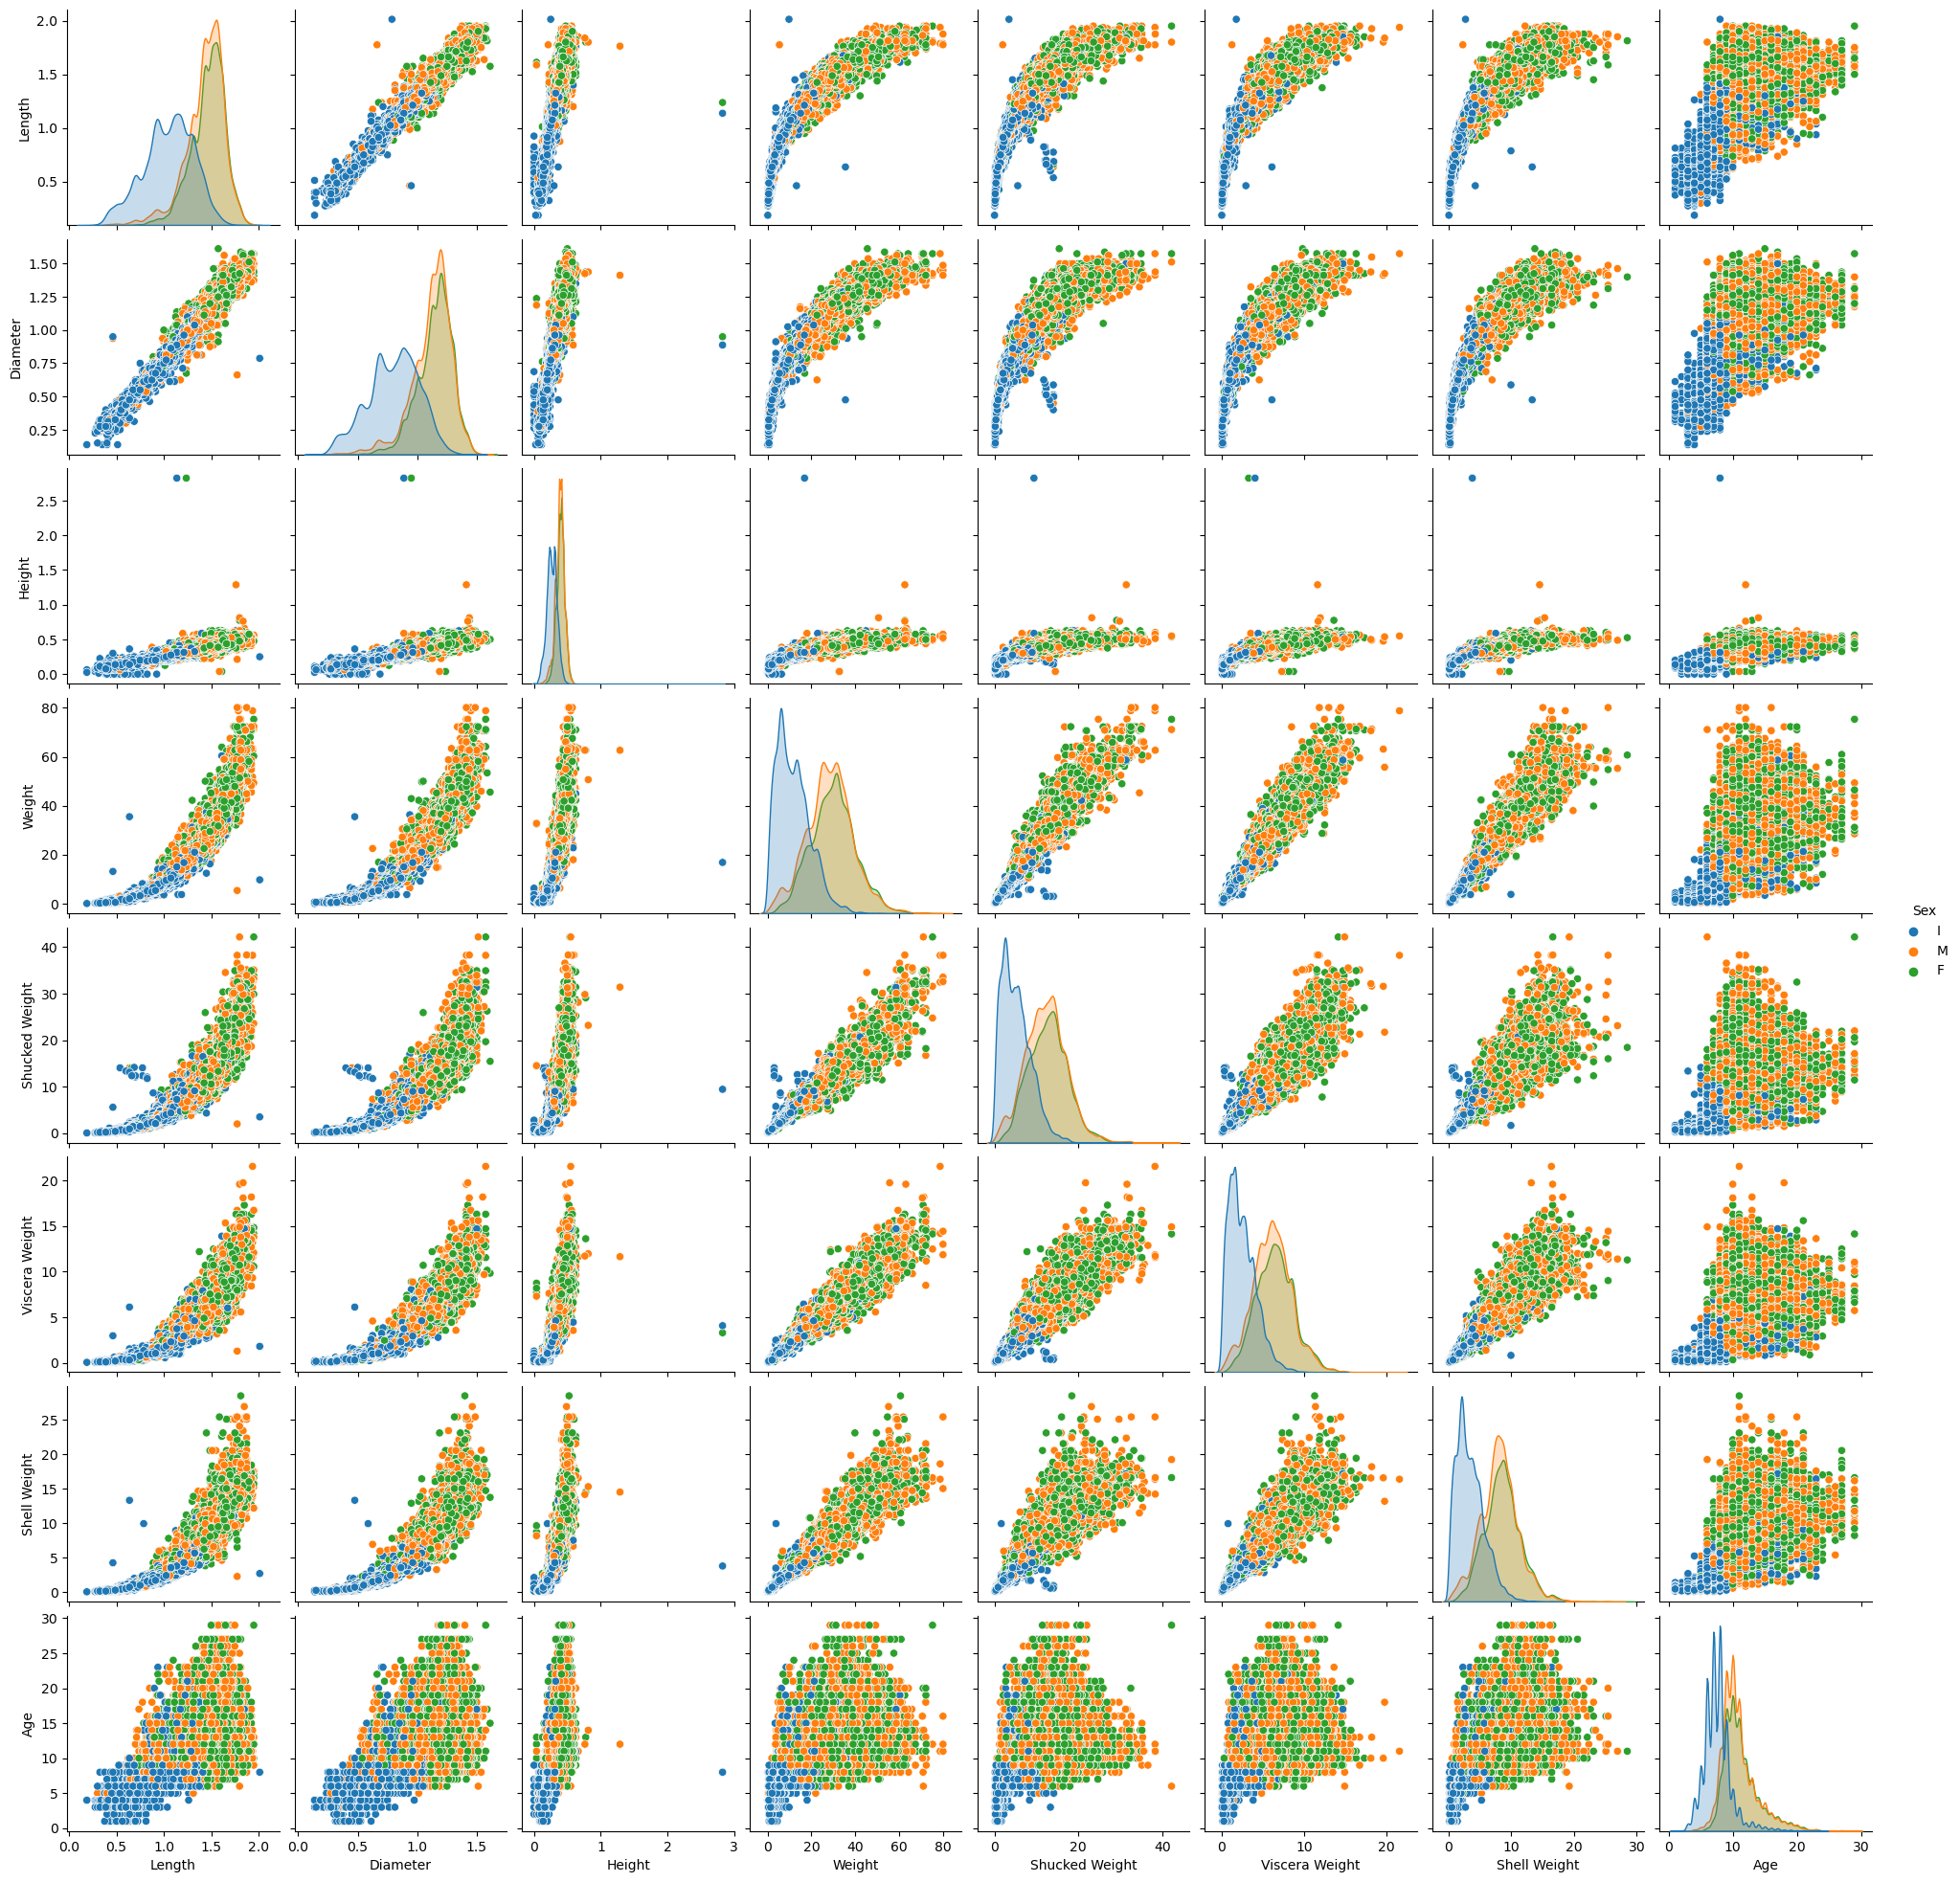

In [13]:
sns.pairplot(data=train, hue='Sex')

<Axes: >

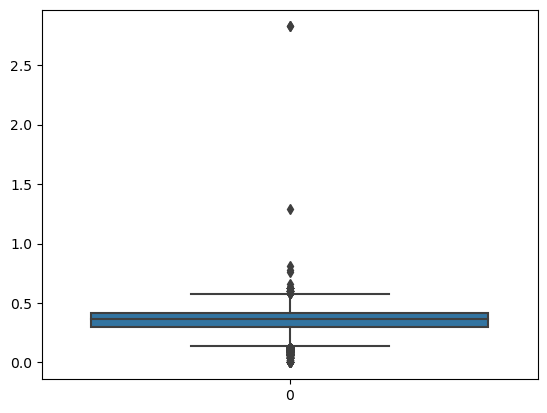

In [16]:
sns.boxplot(train['Height'])

In [19]:
drop_index = train[train['Height'] > 2].index
train.drop(drop_index, axis=0, inplace=True)

/Users/anbschool0029/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


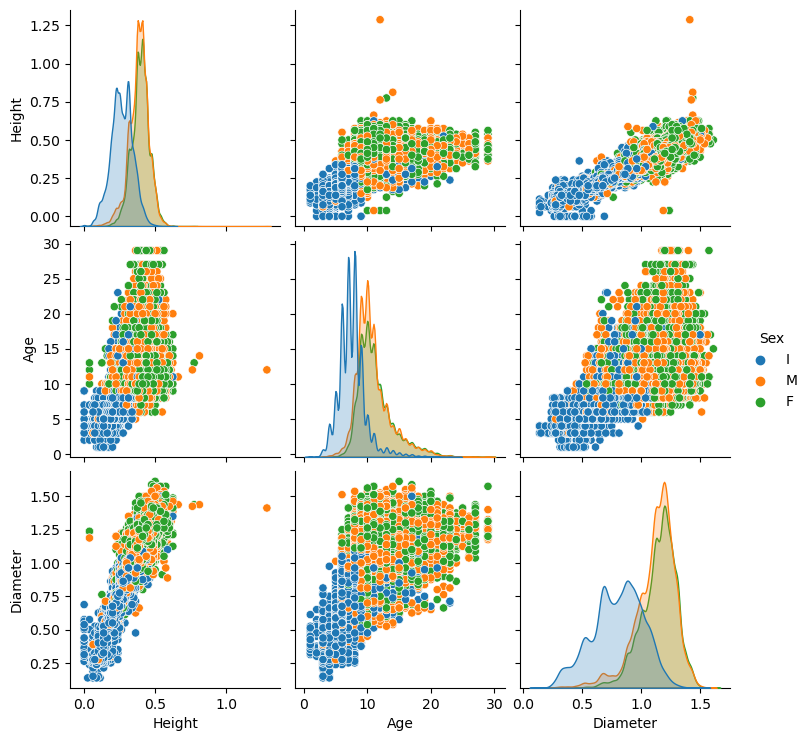

In [24]:
sns.pairplot(train[['Height', 'Age', 'Diameter', 'Sex']], hue='Sex')

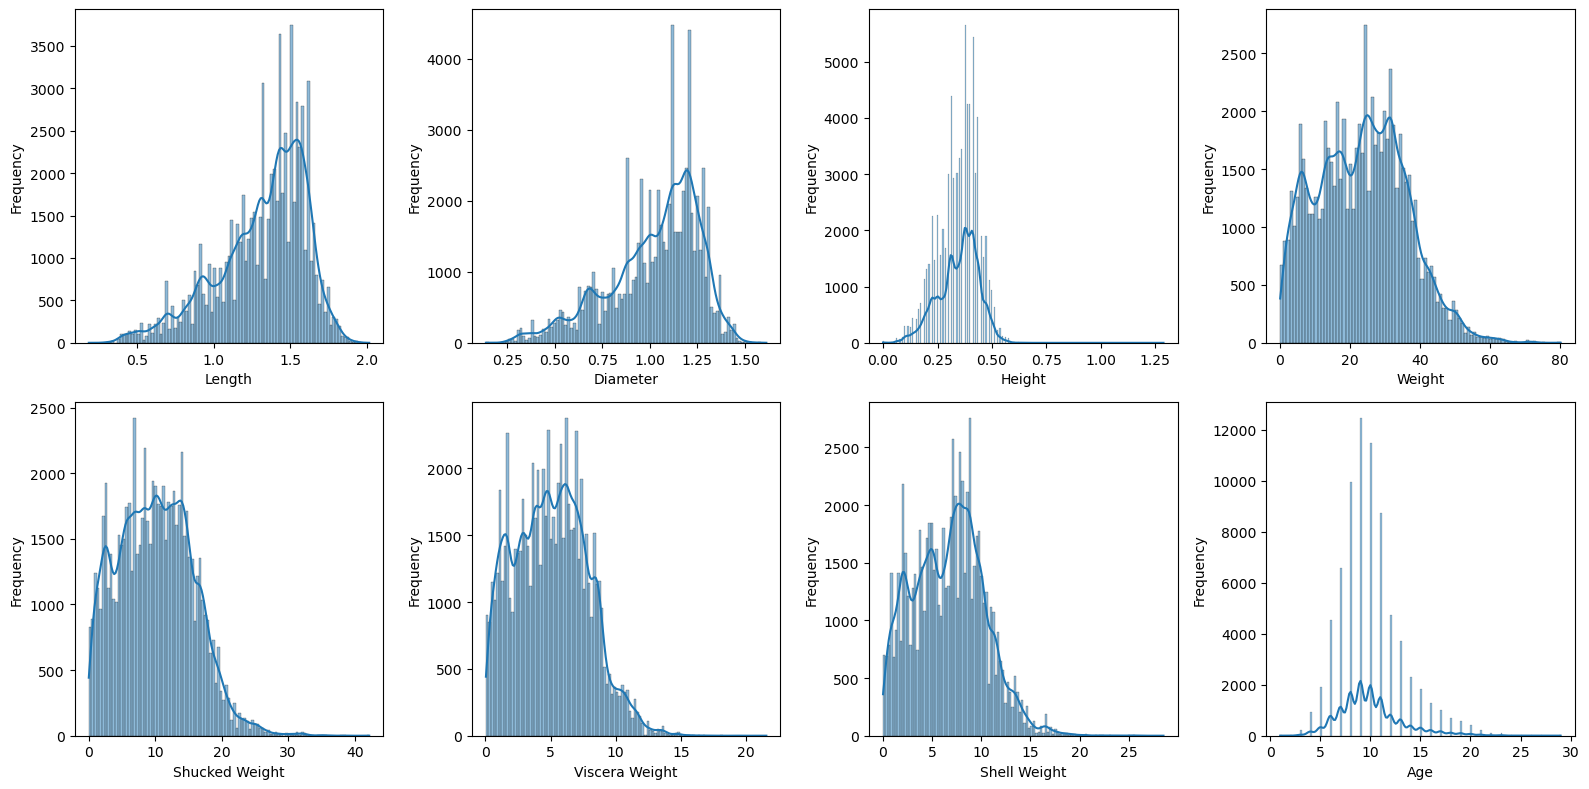

In [34]:
columns_to_plot = train.select_dtypes(exclude='object').columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# flatten the 2D array of axes to make it easier to iterate
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(train[column], ax=axes[i], kde=True)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

<Axes: >

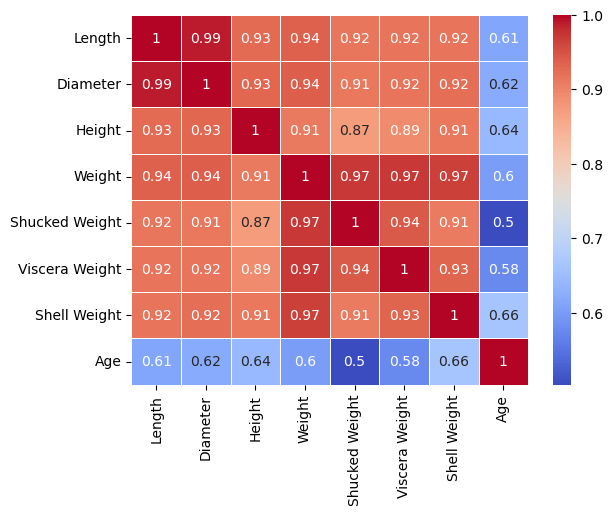

In [39]:
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

__(Diameter and Length) and (Shell Weight and Weight) pairs are highly correlated.__ This might relate to multicollinearity problem. This can cause issues in statistical modeling, because it violates the assumption that predictors should be independent of each other. Multicollinearity can make it difficult to interpret the individual effects of predictors and can lead tto unstable coefficient estimates.
___We can either remove or combine reduntdant variables___. <br>
#### For simplicity, we will remove highly-correlated features which have lower correlation to the target variable `Age` 

In [41]:
drop_col = ['Length', 'Weight']
train.drop(drop_col, axis=1, inplace=True)
test.drop(drop_col, axis=1, inplace=True)
train.head()

,Sex,Diameter,Height,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,
0,I,1.1750,0.3750,12.728926,6.647958,8.348928,9
1,I,0.8250,0.2750,4.521745,2.324659,3.401940,8
2,M,1.1125,0.3750,11.339800,5.556502,6.662133,9
3,F,1.4125,0.5000,20.354941,10.991839,14.996885,11
4,I,1.0125,0.3375,11.977664,4.507570,5.953395,8


In [46]:
print('trainset shape:', train.shape)
print('testset shape:', test.shape)

trainset shape: (74049, 7)
testset shape: (49368, 6)


In [47]:
test.head() # This test set will be used at the very end of model training process

,Sex,Diameter,Height,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,
74051,I,0.7625,0.2750,3.657085,1.729319,2.721552
74052,I,0.8875,0.2750,7.030676,3.246018,3.968930
74053,F,0.9875,0.3250,5.556502,3.883882,4.819415
74054,F,0.9875,0.3875,13.380964,6.548735,7.030676
74055,I,0.8500,0.2625,5.528153,2.466407,3.331066


In [49]:
# create a separate test set for model validation
from sklearn.model_selection import train_test_split

X = train.drop('Age', axis=1)
y = train['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Sex'])

In [50]:
print(X_train['Sex'].value_counts() / len(X_train) * 100)
print(X_test['Sex'].value_counts() / len(X_test) * 100)

Sex
M    36.575567
I    32.351998
F    31.072435
Name: count, dtype: float64
Sex
M    36.576637
I    32.349764
F    31.073599
Name: count, dtype: float64


In [51]:
X_train.columns

Index(['Sex', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight',
       'Shell Weight'],
      dtype='object')